In [ ]:
from google.colab import files

# Upload the files
uploaded = files.upload()

Saving out_30min.csv to out_30min (1).csv
Saving out_15min.csv to out_15min (1).csv
Saving out_10min.csv to out_10min (1).csv
Saving metrics.py to metrics (1).py
Saving load_data.py to load_data (1).py
Saving in_30min.csv to in_30min (1).csv
Saving in_15min.csv to in_15min (1).csv
Saving in_10min.csv to in_10min (1).csv
Saving gcnLayer.py to gcnLayer (1).py
Saving adjacency.csv to adjacency (1).csv
Saving 30 min after normolization.csv to 30 min after normolization (1).csv
Saving 15 min after normolization.csv to 15 min after normolization (1).csv
Saving 10 min after normolization.csv to 10 min after normolization (1).csv


In [ ]:
import os

# List files in the current directory
print(os.listdir())

['.config', '10 min after normolization (1).csv', 'out_10min (1).csv', 'metrics.py', 'gcnLayer.py', 'out_10min.csv', '15 min after normolization (1).csv', 'out_30min (1).csv', 'adjacency.csv', 'in_30min.csv', '__pycache__', '30 min after normolization.csv', '30 min after normolization (1).csv', 'metrics (1).py', 'gcnLayer (1).py', 'load_data (1).py', 'in_10min.csv', 'out_15min.csv', 'in_15min.csv', '10 min after normolization.csv', '15 min after normolization.csv', 'load_data.py', 'in_15min (1).csv', 'adjacency (1).csv', 'out_15min (1).csv', 'in_10min (1).csv', 'out_30min.csv', 'in_30min (1).csv', 'sample_data']


**10 MINTS**

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from load_data import Get_All_Data
from gcnLayer import GraphConvolution1
from metrics import evaluate_performance
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Function to load data and adjacency matrix
def load_data():
    X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, X_train_3, X_test_3, X_train_4, X_test_4 = \
        Get_All_Data(TG=10, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

    adjacency = []
    with open('adjacency.csv') as f:
        data = csv.reader(f, delimiter=",")
        for line in data:
            line = [float(x) for x in line]
            adjacency.append(line)
    adjacency = np.array(adjacency, dtype=np.float32)

    return X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency

# Load the data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency = load_data()


(2330, 276, 30) (2330, 276)
(170, 276, 30) (170, 276)
(170, 276)
3188 0
(2330, 276, 30)
(170, 276, 30)
(276, 276)
(2330, 276, 10)
(170, 276, 10)
(2330, 11, 10)
(170, 11, 10)


In [ ]:
# Define GCN model
def create_gcn_model(adjacency):
    input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
    out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
    out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

    input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
    out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
    out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

    out = keras.layers.concatenate([out1, out2], axis=4)
    out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
    out = Flatten()(out)
    out = Dense(276)(out)

    model = Model(inputs=[input1, input2], outputs=[out])
    model.compile(loss='mse', optimizer=Adam(lr=0.001))

    return model

# Create and train GCN model
gcn_model = create_gcn_model(adjacency)
gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1)


Epoch 1/80
37/37 [==============================] - 2s 17ms/step - loss: 0.0758
Epoch 2/80
37/37 [==============================] - 1s 15ms/step - loss: 0.0188
Epoch 3/80
37/37 [==============================] - 1s 15ms/step - loss: 0.0162
Epoch 4/80
37/37 [==============================] - 0s 13ms/step - loss: 0.0145
Epoch 5/80
37/37 [==============================] - 1s 17ms/step - loss: 0.0131
Epoch 6/80
37/37 [==============================] - 1s 19ms/step - loss: 0.0120
Epoch 7/80
37/37 [==============================] - 1s 15ms/step - loss: 0.0110
Epoch 8/80
37/37 [==============================] - 1s 16ms/step - loss: 0.0102
Epoch 9/80
37/37 [==============================] - 1s 16ms/step - loss: 0.0095
Epoch 10/80
37/37 [==============================] - 1s 21ms/step - loss: 0.0089
Epoch 11/80
37/37 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 12/80
37/37 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 13/80
37/37 [==================

6/6 [==============================] - 0s 3ms/step
 Model RMSE: 31.21235863954444
Performing ADF test on residuals:
ADF Statistic: -17.102912
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Null Hypothesis (H0): Time series is stationary


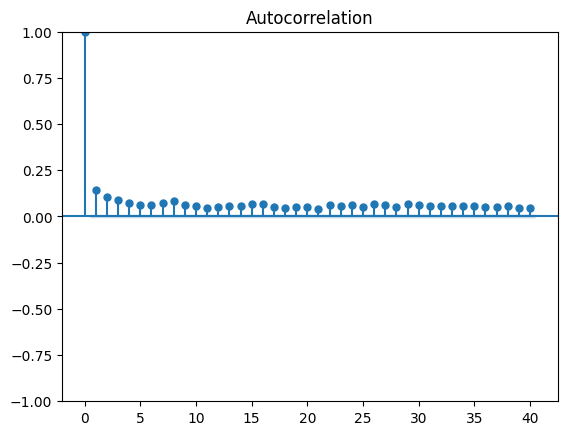

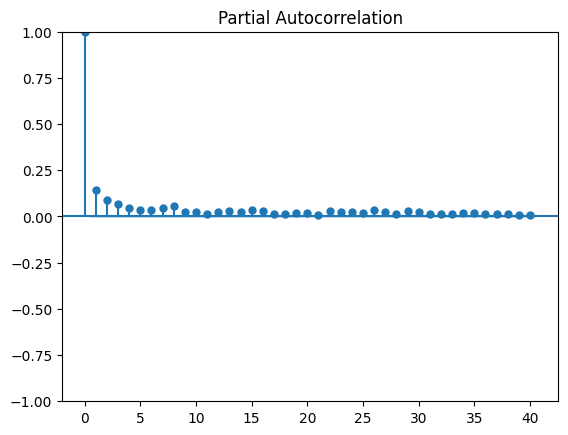

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Get GCN predictions and calculate residuals
gcn_predictions = gcn_model.predict([X_test_1, X_test_2], verbose=1)
gcn_predictions = gcn_predictions.reshape(-1, 276)
gcn_predictions = gcn_predictions * a

residuals = Y_test_original - gcn_predictions
rmse = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))
print(" Model RMSE:", rmse)
# Perform ADF test on residuals
def adf_test(residuals):
    result = adfuller(residuals.flatten())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("Reject Null Hypothesis (H0): Time series is stationary")
    else:
        print("Fail to Reject Null Hypothesis (H0): Time series is non-stationary")

# Perform ADF test on residuals
print("Performing ADF test on residuals:")
adf_test(residuals)
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Compute ACF and PACF
acf = sm.graphics.tsa.plot_acf(residuals.flatten(), lags=40, alpha=0.05)
pacf = sm.graphics.tsa.plot_pacf(residuals.flatten(), lags=40, alpha=0.05)

# Display plots
plt.show()


In [ ]:
# Train ARIMA model on residuals
def train_arima(residuals):
    arima_model = sm.tsa.ARIMA(residuals.flatten(), order=(1, 0, 1))  # Adjust the order as needed
    arima_result = arima_model.fit()
    return arima_result

arima_result = train_arima(residuals)

In [ ]:
# Make ARIMA predictions
arima_predictions = arima_result.predict(start=0, end=len(residuals.flatten())-1)
arima_predictions = arima_predictions.reshape(residuals.shape)

# Combine GCN and ARIMA predictions
final_predictions = gcn_predictions + arima_predictions

# Evaluate the combined model
evaluate_performance(Y_test_original,final_predictions)


RMSE is: 30.168165245674064
R2 is：0.9299174640045642
MAE is：18.085411317411207
WMAPE is0.10292125831041737


(30.168165245674064,
 0.9299174640045642,
 18.085411317411207,
 0.10292125831041737)

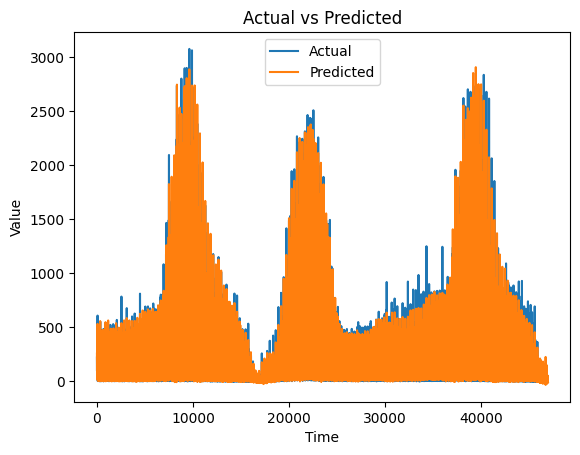

In [ ]:
# Plot RMSE over epochs for GCN training
rmse_gcn = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))


# Plot the final combined predictions
plt.plot(Y_test_original.flatten(), label='Actual')
plt.plot(final_predictions.flatten(), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


**15 MINTS**

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from load_data import Get_All_Data
from gcnLayer import GraphConvolution1
from metrics import evaluate_performance
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Function to load data and adjacency matrix
def load_data():
    X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, X_train_3, X_test_3, X_train_4, X_test_4 = \
        Get_All_Data(TG=15, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

    adjacency = []
    with open('adjacency.csv') as f:
        data = csv.reader(f, delimiter=",")
        for line in data:
            line = [float(x) for x in line]
            adjacency.append(line)
    adjacency = np.array(adjacency, dtype=np.float32)

    return X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency

# Load the data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency = load_data()


(1430, 276, 30) (1430, 276)
(170, 276, 30) (170, 276)
(170, 276)
4744 0
(1430, 276, 30)
(170, 276, 30)
(276, 276)
(1430, 276, 10)
(170, 276, 10)
(1430, 11, 10)
(170, 11, 10)


In [ ]:
# Define GCN model
def create_gcn_model(adjacency):
    input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
    out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
    out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

    input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
    out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
    out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

    out = keras.layers.concatenate([out1, out2], axis=4)
    out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
    out = Flatten()(out)
    out = Dense(276)(out)

    model = Model(inputs=[input1, input2], outputs=[out])
    model.compile(loss='mse', optimizer=Adam(lr=0.001))

    return model

# Create and train GCN model
gcn_model = create_gcn_model(adjacency)
gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1)


Epoch 1/80
23/23 [==============================] - 2s 16ms/step - loss: 0.0888
Epoch 2/80
23/23 [==============================] - 0s 13ms/step - loss: 0.0244
Epoch 3/80
23/23 [==============================] - 0s 13ms/step - loss: 0.0203
Epoch 4/80
23/23 [==============================] - 0s 12ms/step - loss: 0.0188
Epoch 5/80
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 6/80
23/23 [==============================] - 0s 14ms/step - loss: 0.0167
Epoch 7/80
23/23 [==============================] - 0s 14ms/step - loss: 0.0159
Epoch 8/80
23/23 [==============================] - 0s 14ms/step - loss: 0.0151
Epoch 9/80
23/23 [==============================] - 0s 15ms/step - loss: 0.0144
Epoch 10/80
23/23 [==============================] - 0s 14ms/step - loss: 0.0138
Epoch 11/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0132
Epoch 12/80
23/23 [==============================] - 0s 17ms/step - loss: 0.0127
Epoch 13/80
23/23 [==================

6/6 [==============================] - 0s 3ms/step
Model RMSE: 41.31818533145693
Performing ADF test on residuals:
ADF Statistic: -19.400581
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Null Hypothesis (H0): Time series is stationary


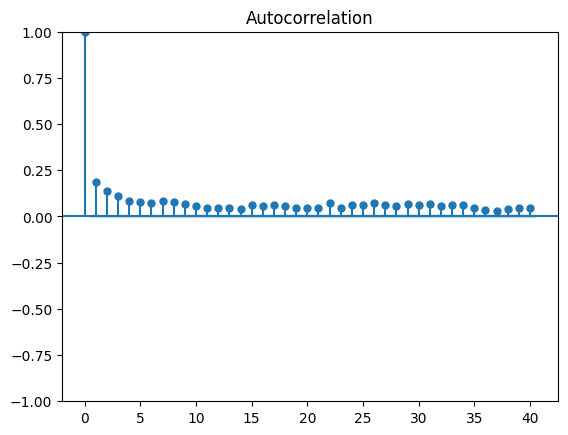

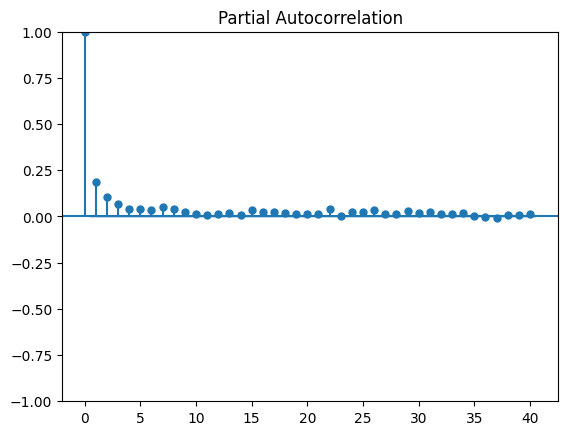

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Get GCN predictions and calculate residuals
gcn_predictions = gcn_model.predict([X_test_1, X_test_2], verbose=1)
gcn_predictions = gcn_predictions.reshape(-1, 276)
gcn_predictions = gcn_predictions * a

residuals = Y_test_original - gcn_predictions
rmse = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))
print("Model RMSE:", rmse)
# Perform ADF test on residuals
def adf_test(residuals):
    result = adfuller(residuals.flatten())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("Reject Null Hypothesis (H0): Time series is stationary")
    else:
        print("Fail to Reject Null Hypothesis (H0): Time series is non-stationary")

# Perform ADF test on residuals
print("Performing ADF test on residuals:")
adf_test(residuals)
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Compute ACF and PACF
acf = sm.graphics.tsa.plot_acf(residuals.flatten(), lags=40, alpha=0.05)
pacf = sm.graphics.tsa.plot_pacf(residuals.flatten(), lags=40, alpha=0.05)

# Display plots
plt.show()


In [ ]:
# Train ARIMA model on residuals
def train_arima(residuals):
    arima_model = sm.tsa.ARIMA(residuals.flatten(), order=(1, 0, 1))  # Adjust the order as needed
    arima_result = arima_model.fit()
    return arima_result

arima_result = train_arima(residuals)

In [ ]:
# Make ARIMA predictions
arima_predictions = arima_result.predict(start=0, end=len(residuals.flatten())-1)
arima_predictions = arima_predictions.reshape(residuals.shape)

# Combine GCN and ARIMA predictions
final_predictions = gcn_predictions + arima_predictions

evaluate_performance(Y_test_original,final_predictions)

RMSE is: 40.08848749801823
R2 is：0.9538909766434375
MAE is：23.814417495445014
WMAPE is0.08771043017466848


(40.08848749801823,
 0.9538909766434375,
 23.814417495445014,
 0.08771043017466848)

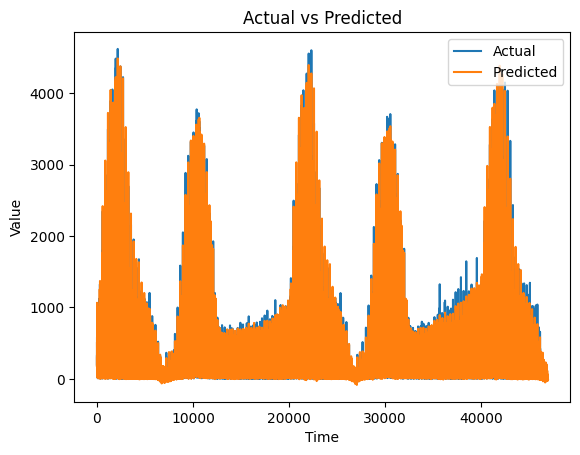

In [ ]:
# Plot RMSE over epochs for GCN training
rmse_gcn = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))


# Plot the final combined predictions
plt.plot(Y_test_original.flatten(), label='Actual')
plt.plot(final_predictions.flatten(), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


**30 MINTS**

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from load_data import Get_All_Data
from gcnLayer import GraphConvolution1
from metrics import evaluate_performance
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Function to load data and adjacency matrix
def load_data():
    X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, X_train_3, X_test_3, X_train_4, X_test_4 = \
        Get_All_Data(TG=30, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

    adjacency = []
    with open('adjacency.csv') as f:
        data = csv.reader(f, delimiter=",")
        for line in data:
            line = [float(x) for x in line]
            adjacency.append(line)
    adjacency = np.array(adjacency, dtype=np.float32)

    return X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency

# Load the data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency = load_data()


(530, 276, 30) (530, 276)
(170, 276, 30) (170, 276)
(170, 276)
8940 0
(530, 276, 30)
(170, 276, 30)
(276, 276)
(530, 276, 10)
(170, 276, 10)
(530, 11, 10)
(170, 11, 10)


In [ ]:
# Define GCN model
def create_gcn_model(adjacency):
    input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
    out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
    out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

    input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
    out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
    out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

    out = keras.layers.concatenate([out1, out2], axis=4)
    out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
    out = Flatten()(out)
    out = Dense(276)(out)

    model = Model(inputs=[input1, input2], outputs=[out])
    model.compile(loss='mse', optimizer=Adam(lr=0.001))

    return model

# Create and train GCN model
gcn_model = create_gcn_model(adjacency)
gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1)


Epoch 1/80
9/9 [==============================] - 3s 44ms/step - loss: 0.2264
Epoch 2/80
9/9 [==============================] - 0s 14ms/step - loss: 0.0735
Epoch 3/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0337
Epoch 4/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0230
Epoch 5/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0211
Epoch 6/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0195
Epoch 7/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0184
Epoch 8/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 9/80
9/9 [==============================] - 0s 14ms/step - loss: 0.0171
Epoch 10/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0166
Epoch 11/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0161
Epoch 12/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0156
Epoch 13/80
9/9 [==============================] - 0s 12ms/st

6/6 [==============================] - 0s 4ms/step
Model RMSE: 86.97710925659271
Performing ADF test on residuals:
ADF Statistic: -15.616575
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Null Hypothesis (H0): Time series is stationary


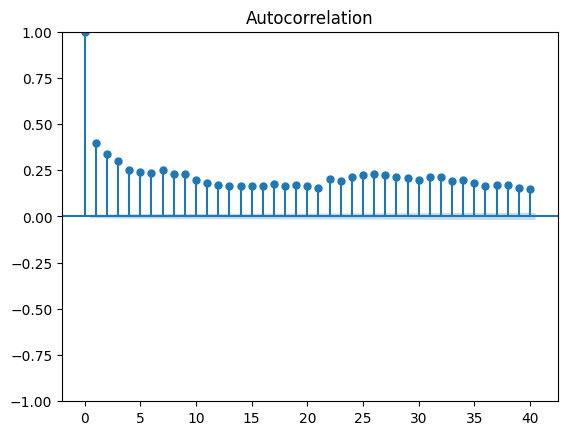

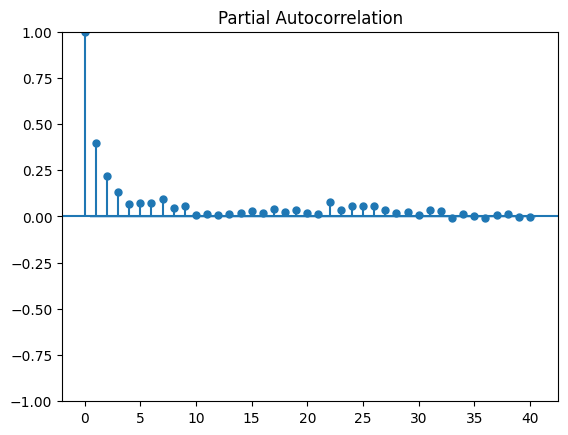

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Get GCN predictions and calculate residuals
gcn_predictions = gcn_model.predict([X_test_1, X_test_2], verbose=1)
gcn_predictions = gcn_predictions.reshape(-1, 276)
gcn_predictions = gcn_predictions * a

residuals = Y_test_original - gcn_predictions
rmse = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))
print("Model RMSE:", rmse)
# Perform ADF test on residuals
def adf_test(residuals):
    result = adfuller(residuals.flatten())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("Reject Null Hypothesis (H0): Time series is stationary")
    else:
        print("Fail to Reject Null Hypothesis (H0): Time series is non-stationary")

# Perform ADF test on residuals
print("Performing ADF test on residuals:")
adf_test(residuals)
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Compute ACF and PACF
acf = sm.graphics.tsa.plot_acf(residuals.flatten(), lags=40, alpha=0.05)
pacf = sm.graphics.tsa.plot_pacf(residuals.flatten(), lags=40, alpha=0.05)

# Display plots
plt.show()


In [ ]:
# Train ARIMA model on residuals
def train_arima(residuals):
    arima_model = sm.tsa.ARIMA(residuals.flatten(), order=(1, 0, 1))  # Adjust the order as needed
    arima_result = arima_model.fit()
    return arima_result

arima_result = train_arima(residuals)

In [ ]:
# Make ARIMA predictions
arima_predictions = arima_result.predict(start=0, end=len(residuals.flatten())-1)
arima_predictions = arima_predictions.reshape(residuals.shape)

# Combine GCN and ARIMA predictions
final_predictions = gcn_predictions + arima_predictions

evaluate_performance(Y_test_original,final_predictions)

RMSE is: 75.88756601691018
R2 is：0.9012951913371363
MAE is：43.56089464305819
WMAPE is0.08432146989022364


(75.88756601691018, 0.9012951913371363, 43.56089464305819, 0.08432146989022364)

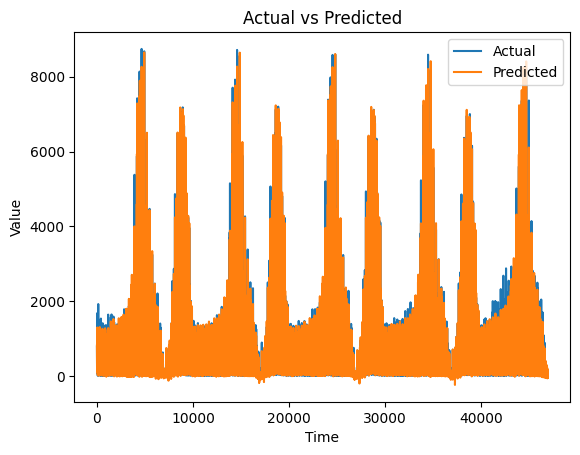

In [ ]:
# Plot RMSE over epochs for GCN training
rmse_gcn = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))


# Plot the final combined predictions
plt.plot(Y_test_original.flatten(), label='Actual')
plt.plot(final_predictions.flatten(), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
